
### Завдання 1: Виклик LLM з базовим промптом

Створіть можливість викликати LLM зі звичайним текстовим промптом.

Промпт має дозвляти отримати інформацію простою мовою на певну тему. В цьому завданні ми хочемо дізнатись про тему "Квантові обчислення".

Відповідь моделі повинна містити визначення, ключові переваги та поточні дослідження в цій галузі.

Обмежте відповідь до 200 символів і пропишіть в промпті аби відповідь була короткою (це зекономить Вам час і гроші на згенеровані токени).

В якості LLM можна скористатись як моделлю з HugginFace (рекомендую Mistral), так і ChatGPT4 або ChatGPT3. В обох випадках треба імпортувати потрібну "обгортку" (тобто клас, який дозволить ініціювати модель) з LangChain для виклику LLM за API, а також зчитати особистий токен з файла, наприклад, `creds.json`, який розміщений у Вас локально і Ви НЕ здаєте його в ДЗ і НЕ комітите в git 😏

Встановіть своє значення температури на свій розсуд (тут немає правильного чи неправильного значення) і напишіть, чому ви обрали саме таке значення для цього завдання.  

Запити можна робити як українською, так і англійською - орієнтуйтесь на те, де і чи хочете ви потім лишити цей проєкт і відповідна яка мова буде пасувати більше. В розвʼязках промпти - українською.

In [ ]:
!pip -q install langchain langchain_community huggingface_hub duckduckgo_search
!pip -q install langchain_openai tavily-python langchain_experimental openai

In [ ]:
import json
import os
from langchain_community.llms import HuggingFaceHub

from langchain.prompts import PromptTemplate

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool
from langchain_openai import OpenAI

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from langchain_openai import ChatOpenAI
from langchain_experimental.tools import PythonAstREPLTool


In [2]:
with open('creds.json') as file:
    creds = json.load(file)

os.environ["HUGGINGFACEHUB_API_TOKEN"] = creds["HUGGINGFACEHUB_API_TOKEN"]

overal_temperature = 0.3

llm = HuggingFaceHub(repo_id="mistralai/Mistral-7B-Instruct-v0.3", model_kwargs={"temperature": overal_temperature, "max_length": 200})

prompt = """Briefly explain what quantum computing is, its key advantages, and current research.
The answer should be within 200 characters.
"""

response = llm.invoke(prompt)
print(response)

<ipython-input-2-b1df1fd4cf12>:12: LangChainDeprecationWarning: The class `HuggingFaceHub` was deprecated in LangChain 0.0.21 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEndpoint``.
  llm = HuggingFaceHub(repo_id="mistralai/Mistral-7B-Instruct-v0.3", model_kwargs={"temperature": overal_temperature, "max_length": 200})
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggi

Briefly explain what quantum computing is, its key advantages, and current research.
The answer should be within 200 characters.

Quantum computing is a revolutionary technology that utilizes quantum-mechanical phenomena, such as superposition and entanglement, to perform operations on data. Its key advantages include the ability to solve complex problems exponentially faster than classical computers, making it ideal for applications like cryptography, optimization, and machine learning. Current research focuses on developing practical quantum algorithms, building scalable quantum hardware, and improving error correction techniques.


### Завдання 2: Створення параметризованого промпта для генерації тексту
Тепер ми хочемо оновити попередній фукнціонал так, аби в промпт ми могли передавати тему як параметр. Для цього скористайтесь `PromptTemplate` з `langchain` і реалізуйте параметризований промпт та виклик моделі з ним.

Запустіть оновлений функціонал (промпт + модел) для пояснень про теми
- "Баєсівські методи в машинному навчанні"
- "Трансформери в машинному навчанні"
- "Explainable AI"

Виведіть результати відпрацювання моделі на екран.

In [3]:
prompt_template = PromptTemplate(
    input_variables=["topic"],
    template="""Briefly explain what {topic} is, its key advantages, and current research.
The answer should be within 200 characters.
"""
)

topics = [
    "Bayesian methods in machine learning",
    "Transformers in machine learning",
    "Explainable AI"
]

for topic in topics:
    prompt = prompt_template.format(topic=topic)
    response = llm.invoke(prompt)
    print(f"\nTopic: {topic}\nResponse: {response}\n")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)



Topic: Bayesian methods in machine learning
Response: Briefly explain what Bayesian methods in machine learning is, its key advantages, and current research.
The answer should be within 200 characters.

Bayesian methods in machine learning are probabilistic models that update beliefs (or probabilities) as new data is observed. Key advantages include: (1) ability to handle uncertainty, (2) natural incorporation of prior knowledge, and (3) efficient learning in high-dimensional spaces. Current research focuses on scalable Bayesian inference, Bayesian optimization, and Bayesian deep learning.



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)



Topic: Transformers in machine learning
Response: Briefly explain what Transformers in machine learning is, its key advantages, and current research.
The answer should be within 200 characters.

Transformers in machine learning are a type of model architecture that use self-attention mechanisms to process input data. They excel in handling long-range dependencies and are particularly effective for natural language processing tasks. Key advantages include improved performance on tasks like translation and text summarization, and the ability to handle sequences of varying lengths. Current research focuses on improving efficiency, reducing training time, and applying Transformers to new domains such as image and speech processing.



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)



Topic: Explainable AI
Response: Briefly explain what Explainable AI is, its key advantages, and current research.
The answer should be within 200 characters.

Explainable AI (XAI) is a subfield of AI that aims to make AI systems' decisions understandable to humans. It offers transparency, accountability, and trust, crucial for safety and ethical considerations. Current research focuses on developing interpretable models, visualizing AI decision-making processes, and creating explanations in natural language. This helps users understand and trust AI systems, particularly in high-stakes applications like healthcare and finance.





### Завдання 3: Використання агента для автоматизації процесів
Створіть агента, який допоможе автоматично шукати інформацію про останні наукові публікації в різних галузях. Наприклад, агент має знайти 5 останніх публікацій на тему штучного інтелекту.

**Кроки:**
1. Налаштуйте агента типу ReAct в LangChain для виконання автоматичних запитів.
2. Створіть промпт, який спрямовує агента шукати інформацію в інтернеті або в базах даних наукових публікацій.
3. Агент повинен видати список публікацій, кожна з яких містить назву, авторів і короткий опис.

Для взаємодії з пошуком там необхідно створити `Tool`. В лекції ми використовували `serpapi`. Можна продовжити користуватись ним, або обрати інше АРІ для пошуку (вони в тому числі є безкоштовні). Перелік різних АРІ, доступних в langchain, і орієнтир по вартості запитів можна знайти в окремому документі [тут](https://hannapylieva.notion.site/API-12994835849480a69b2adf2b8441cbb3?pvs=4).

Лишаю також нижче приклад використання одного з безкоштовних пошукових АРІ - DuckDuckGo (не потребує створення токена!)  - можливо він вам сподобається :)


In [5]:
from langchain_community.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun()

search.invoke("Obama's first name?")

"The White House, official residence of the president of the United States, in July 2008. The president of the United States is the head of state and head of government of the United States, [1] indirectly elected to a four-year term via the Electoral College. [2] Under the U.S. Constitution, the officeholder leads the executive branch of the federal government and is the commander-in-chief of ... The Irish Sun, It's a fake Barack Obama's brother posts forged document he claims is ex-president's 'Kenyan birth certificate,' March 11, 2017 Salon, Orly Taitz is at it again , Sept. 4, 2009 As the head of the government of the United States, the president is arguably the most powerful government official in the world. The president is elected to a four-year term via an electoral college system. Since the Twenty-second Amendment was adopted in 1951, the American presidency has been limited to a maximum of two terms.. Click on a president below to learn more about each presidency ... Timeline

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # там якась фігня вилазить, вона мені заважала


with open("creds.json") as file:
    creds = json.load(file)

os.environ["HUGGINGFACEHUB_API_TOKEN"] = creds["HUGGINGFACEHUB_API_TOKEN"]
os.environ["TAVILY_API_KEY"] = creds["TAVILY_API_KEY"]

llm = HuggingFaceHub(
    repo_id="mistralai/Mistral-7B-Instruct-v0.2",
    model_kwargs={"temperature": 0.3, "max_length": 300}
)

search_tool = TavilySearchResults()

def extract_paper_info(title, url):
    prompt = f"Extract authors and a short summary from the research paper titled '{title}' available at {url}. Return in format: 'Authors: ..., Summary: ...'"

    try:
        response = llm.invoke(prompt)

        return response.strip()
    except Exception as e:
        print(f"⚠️ Error fetching summary: {e}")
        return "Authors and summary not available."

tools = [
    Tool(
        name="ScholarSearch",
        func=search_tool.run,
        description="Use this tool to find the latest scientific publications in Google Scholar. Input should be a research topic."
    )
]

agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_errors=True
)

def research_papers(topic):
    print(f"\n🔍 Searching for latest research papers on: {topic}")

    query = f"latest research papers on {topic}"
    search_results = search_tool.run(query)

    for res in search_results[:5]:
        if isinstance(res, dict) and "title" in res and "url" in res:
            print(f"\n📌 {res['title']}\n🔗 {res['url']}")
            details = extract_paper_info(res['title'], res['url'])
            print(f"📝 {details}\n")
        else:
            print(f"📝 {res}")


topics = [
    "Bayesian methods in machine learning",
    "Transformers in machine learning",
    "Explainable AI"
]

for topic in topics:
    research_papers(topic)



🔍 Searching for latest research papers on: Bayesian methods in machine learning

📌 Bayesian learning for neural networks: an algorithmic survey
🔗 https://link.springer.com/article/10.1007/s10462-023-10443-1
📝 Extract authors and a short summary from the research paper titled 'Bayesian learning for neural networks: an algorithmic survey' available at https://link.springer.com/article/10.1007/s10462-023-10443-1. Return in format: 'Authors: ..., Summary: ...'

Authors: Neal, R. M.
Summary: This paper provides an overview of Bayesian methods for training neural networks. The author discusses the challenges of applying Bayesian inference to neural networks and presents various approaches to address these challenges, including variational inference, Markov chain Monte Carlo methods, and Laplace approximation. The paper also covers the use of Bayesian neural networks for model selection, uncertainty estimation, and anomaly detection. The author concludes by discussing the advantages and limi



### Завдання 4: Створення агента-помічника для вирішення бізнес-задач

Створіть агента, який допомагає вирішувати задачі бізнес-аналітики. Агент має допомогти користувачу створити прогноз по продажам на наступний рік враховуючи рівень інфляції і погодні умови. Агент має вміти використовувати Python і ходити в інтернет аби отримати актуальні дані.

**Кроки:**
1. Налаштуйте агента, який працюватиме з аналітичними даними, заданими текстом. Користувач пише

```
Ми експортуємо апельсини з Бразилії. В 2021 експортували 200т, в 2022 - 190т, в 2023 - 210т, в 2024 який ще не закінчився - 220т. Зроби оцінку скільки ми зможемо експортувати апельсинів в 2025 враховуючи погодні умови в Бразилії і попит на апельсини в світі виходячи з економічної ситуації.
```

2. Створіть запит до агента, що містить чітке завдання – видати результат бізнес аналізу або написати, що він не може цього зробити і запит користувача (просто може бути все одним повідомлленням).

3. Запустіть агента і проаналізуйте результати. Що можна покращити?




> Entering new AgentExecutor chain...
To predict the orange export volume for 2026 from Brazil, I need to consider both the weather conditions in Brazil, which can affect agricultural outputs, and the global economic conditions, which influence demand for oranges.

Thought: I first need to gather up-to-date weather data for Brazil to understand the climatic conditions that might impact orange production in 2026.

Action: WeatherData

Action Input: {"country": "Brazil", "year": 2026}

Observation: [{'title': 'Rain boosts São Paulo orange orchards, but 2025/2026 harvest ...', 'url': 'https://www.freshplaza.com/latin-america/article/9694656/rain-boosts-sao-paulo-orange-orchards-but-2025-2026-harvest-hinges-on-consistent-weather/', 'content': 'However, the future of orange production remains uncertain, hinging on consistent, well-distributed rainfall in early 2025. Insufficient', 'score': 0.7817479}, {'title': 'Brazil: Rains in the citrus belt bring expectations of a recovery in ...', 'u

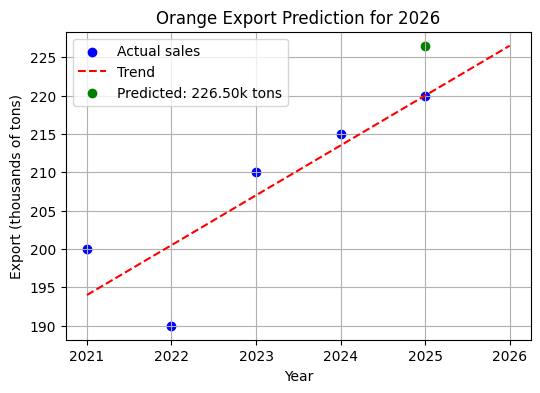


Observation: 📊 Прогнозований експорт апельсинів у 2026 році: 226.50 тис. тонн.
Thought:I now know the final answer based on the analysis that includes both the historical export data, projected global demand factors, and climatic conditions affecting production.

Final Answer: The estimated export volume of oranges from Brazil in 2026 is predicted to be about 226.5 thousand tons.

> Finished chain.

🔍 **Відповідь агента:**
{'input': 'Ми експортуємо апельсини з Бразилії. В 2021 експортували 200т, в 2022 - 190т, в 2023 - 210т, в 2024 - 215т, в 2025 який ще не закінчився - 220т. \nЗроби оцінку скільки ми зможемо експортувати апельсинів в 2026 враховуючи погодні умови в Бразилії і попит на апельсини в світі виходячи з економічної ситуації.', 'output': 'The estimated export volume of oranges from Brazil in 2026 is predicted to be about 226.5 thousand tons.'}


In [48]:
with open("creds.json") as file:
    creds = json.load(file)

os.environ["OPENAI_API_KEY"] = creds["OPENAI_API_KEY"]
os.environ["TAVILY_API_KEY"] = creds["TAVILY_API_KEY"]

llm = ChatOpenAI(model="gpt-4-turbo") # тільки chat gpt зміг витягнути цю всю машину

search_tool = TavilySearchResults()
python_tool = PythonAstREPLTool()

def get_economic_data(*args, **kwargs):  # Додаємо `*args, **kwargs` бо воно ригало
    query = "Global demand for oranges and inflation impact on agriculture 2025"
    results = search_tool.run(query)
    return results[:3]

def get_weather_data(*args, **kwargs):
    query = "Weather conditions in Brazil affecting orange production 2025"
    results = search_tool.run(query)
    return results[:3]

def predict_sales(*args, **kwargs):
    years = np.array([2021, 2022, 2023, 2024, 2025])
    sales = np.array([200, 190, 210, 215, 220])

    coef = np.polyfit(years, sales, 1)
    trend = np.poly1d(coef)
    predicted_sales = trend(2026)

    plt.figure(figsize=(6, 4))
    plt.scatter(years, sales, label="Actual sales", color="blue")
    plt.plot(range(2021, 2027), trend(range(2021, 2027)), label="Trend", linestyle="dashed", color="red")
    plt.scatter(2025, predicted_sales, color="green", label=f"Predicted: {predicted_sales:.2f}k tons")
    plt.xlabel("Year")
    plt.ylabel("Export (thousands of tons)")
    plt.title("Orange Export Prediction for 2026")
    plt.legend()
    plt.grid(True)
    plt.show()

    return f"📊 Прогнозований експорт апельсинів у 2026 році: {predicted_sales:.2f} тис. тонн."

tools = [
    Tool(name="EconomicData", func=get_economic_data, description="Fetches global economic data for orange demand."),
    Tool(name="WeatherData", func=get_weather_data, description="Fetches weather data for Brazil."),
    Tool(name="PythonAnalysis", func=predict_sales, description="Predicts orange export for 2026."),
    python_tool
]

agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_errors=True
)

query = """Ми експортуємо апельсини з Бразилії. В 2021 експортували 200т, в 2022 - 190т, в 2023 - 210т, в 2024 - 215т, в 2025 який ще не закінчився - 220т.
Зроби оцінку скільки ми зможемо експортувати апельсинів в 2026 враховуючи погодні умови в Бразилії і попит на апельсини в світі виходячи з економічної ситуації."""

response = agent.invoke({"input": query})
print("\n🔍 **Відповідь агента:**")
print(response)


**Висновки**

1 -- результат дуже очікуваний, модель показала нам стабільний ріст

2 -- окрім лін регресії можна було б використати якийсь більш просунутий метод МН. Також додати побільше параметрів погоди або економічних параметрів країни чи бізнесу.